# The Sharing Economy: Impact of Ride Hailing

Principal Investigator: Liza Sakhaie

Email: liza.sakhaie@stern.nyu.edu


In this project, I will study how ride hailing apps have grown recently. I will use data over the past 5 years, since this is when ride sharing became particularly popular.

I will also explore the decline of the NYC taxi industry in contrast to the rise of ride-hailing apps.

The data holds the potential to portray a few different trends:

- The rise of Ride Hailing apps (using number of rides/year as a measurement) and the decline of NYC Yellow Taxis
- The Y-O-Y growth rates for each ride hailing app, in order to show the increase in popularity Uber's comeptition
- The growth in the number of drivers for each ride hailing app
- The increase in the trend for ride-sharing
- The seasonality of ride-hailing apps


### The Data

The data used in this project comes from NYC open data (https://data.cityofnewyork.us/Transportation/FHV-Base-Aggregate-Report/2v9c-2k7f), which has aggregated ride information on many car companies including the four most popular ride hailing apps that I plan on including in this project: Uber, Lyft, Via and Juno. 

The ride-hailing data is all on one data set and includes info from 2015-2018. The information includes the month/year for each brand, the total dispatched trips for that month, the total dispatched shared trips, and the unique dispatched vehicles. 

The second data set I will pull in comes frmo the NYC Taxi and Limousine Commission (https://www1.nyc.gov/site/tlc/about/aggregated-reports.page). This includes monthly aggregated data for yellow and green cabs through 2018. 

Access: I will use the BEA's API to download and access the data. Below I demonstrate that I have the ability to access the data.

Requisite Packages: Below I bring in the packages I need...

### Importing all potentially necessary packages

In [131]:
from IPython.display import display, Image # Displays things nicely
import pandas as pd # Key tool 
import matplotlib.pyplot as plt # Helps plot
import numpy as np # Numerical operations
import os
import csv
import descartes

import geopandas as gpd  
from shapely.geometry import Point, Polygon 

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

%matplotlib inline 

### Bringing in my data

In [506]:
ride_hailing= "/Users/rksaks/Desktop/Taxi idea/FHV_Base_Aggregate_report-2.xls"

In [507]:
ride_hailing=pd.read_excel(ride_hailing)

In [508]:
ride_hailing.head(10)

,Base License Number,Base Name,DBA,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
0,B02849,BROOKLYN RIDES CORP,NaN,2018,11,November,16493,192,122
1,B02686,STANDARD LIMOUSINE & CAR SERVICE GROUP LLC.,NaN,2018,7,July,61,0,15
2,B01741,MONACO LIMO & CAR SERVICES INC.,NaN,2016,9,September,1790,0,12
3,b00965,BEN JEVO MGT. INC.,NEWPORT CAR SERVICE,2016,1,January,7623,0,49
4,B02509,NY MINUTE CAR SERVICE INC.,NaN,2018,9,September,9284,0,54
5,B02790,"LAN TIAN CAR SERVICE, INC",NaN,2018,11,November,6,0,2
6,B01381,CLASSIC CAR SERVICE CORP.,PAISA CLASSIC,2016,6,June,4173,0,45
7,B01876,QUALITY EXECUTIVE LIMOUSINE L.L.C,NaN,2018,5,May,35,0,5
8,B00202,"EXCELSIOR CAR & LIMO, INC.",NaN,2018,9,September,228,0,8
9,B03105,MAZNA TRANSPORTATION CORPORATION,NaN,2018,10,October,142,0,9


In [509]:
taxi_file_path= "/Users/rksaks/Desktop/taxi_dataset.csv"

In [510]:
taxi_df= pd.read_csv(taxi_file_path)

In [511]:
taxi_df.head()

,Month/Year,License Class,Trips Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day
0,2019-03,Green,"19,318","3,586","3,296","2,524"
1,2019-03,Yellow,"252,634","21,956","11,912","10,814"
2,2019-03,FHV - High Volume,"769,729","87,695","86,540","59,893"
3,2019-02,Yellow,"250,654","21,733","11,895","10,770"
4,2019-02,Green,"20,481","3,626","3,385","2,651"


## Let's work with our Yellow Taxi Data first
We want to eliminate all other data besides yellow cab data, and then we want to separate the year from the month.

In [512]:
taxi_df = taxi_df[taxi_df["License Class"] == "Yellow"]

In [513]:
taxi_df.head()

,Month/Year,License Class,Trips Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day
1,2019-03,Yellow,"252,634","21,956","11,912","10,814"
3,2019-02,Yellow,"250,654","21,733","11,895","10,770"
6,2019-01,Yellow,"247,315","22,085","11,867","10,582"
12,2018-12,Yellow,"263,609","23,042","11,938","10,803"
18,2018-12,Yellow,"263,609","23,042","11,938","10,803"


Let's break up the month and year so we can group by each...

In [514]:
taxi_df["Month/Year"] = taxi_df["Month/Year"].str.split("-", expand = False)

In [515]:
taxi_df.head()

,Month/Year,License Class,Trips Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day
1,"[2019, 03]",Yellow,"252,634","21,956","11,912","10,814"
3,"[2019, 02]",Yellow,"250,654","21,733","11,895","10,770"
6,"[2019, 01]",Yellow,"247,315","22,085","11,867","10,582"
12,"[2018, 12]",Yellow,"263,609","23,042","11,938","10,803"
18,"[2018, 12]",Yellow,"263,609","23,042","11,938","10,803"


In [516]:
taxi_df["Year"] = taxi_df["Month/Year"].str[0]

In [517]:
taxi_df["Month"] = taxi_df["Month/Year"].str[1]

In [518]:
taxi_df.head()

,Month/Year,License Class,Trips Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Year,Month
1,"[2019, 03]",Yellow,"252,634","21,956","11,912","10,814",2019,03
3,"[2019, 02]",Yellow,"250,654","21,733","11,895","10,770",2019,02
6,"[2019, 01]",Yellow,"247,315","22,085","11,867","10,582",2019,01
12,"[2018, 12]",Yellow,"263,609","23,042","11,938","10,803",2018,12
18,"[2018, 12]",Yellow,"263,609","23,042","11,938","10,803",2018,12


Since our ride-hailing data set groups by the TOTAL number of trips in a month rather than the number of trips per day, we want multiply the "Trips Per Day" column by the number of days in each respective month so the data-sets can work together

In [519]:
taxi_df["Days Per Month"] = taxi_df["Month"]

In [520]:
taxi_df["Days Per Month"].replace({"01":31, "02":28, "03":31, "04":30, "05":31, "06":30, "07":31, "08":31, 
                                 "09":30, "10":31, "11":30, "12":31}, value = None,inplace=True)

In [521]:
taxi_df.head()

,Month/Year,License Class,Trips Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Year,Month,Days Per Month
1,"[2019, 03]",Yellow,"252,634","21,956","11,912","10,814",2019,03,31
3,"[2019, 02]",Yellow,"250,654","21,733","11,895","10,770",2019,02,28
6,"[2019, 01]",Yellow,"247,315","22,085","11,867","10,582",2019,01,31
12,"[2018, 12]",Yellow,"263,609","23,042","11,938","10,803",2018,12,31
18,"[2018, 12]",Yellow,"263,609","23,042","11,938","10,803",2018,12,31


Our "Trips Per Day" column is a string and we need it to be an integer in order to multiply it by the number of days per month. First we must strip out the commas and then we can convert the type.

In [522]:
taxi_df["Trips Per Day"] = taxi_df['Trips Per Day'].str.replace(',', '')

taxi_df["Trips Per Day"] = taxi_df["Trips Per Day"].astype('int64', copy=False)

In [523]:
taxi_df['Total Dispatched Trips'] = taxi_df["Trips Per Day"] * taxi_df["Days Per Month"]

In [524]:
taxi_df.head()

,Month/Year,License Class,Trips Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Year,Month,Days Per Month,Total Dispatched Trips
1,"[2019, 03]",Yellow,252634,"21,956","11,912","10,814",2019,03,31,7831654
3,"[2019, 02]",Yellow,250654,"21,733","11,895","10,770",2019,02,28,7018312
6,"[2019, 01]",Yellow,247315,"22,085","11,867","10,582",2019,01,31,7666765
12,"[2018, 12]",Yellow,263609,"23,042","11,938","10,803",2018,12,31,8171879
18,"[2018, 12]",Yellow,263609,"23,042","11,938","10,803",2018,12,31,8171879


Now we want to group it by year so we can graph it with our ride-hailing data

In [525]:
taxi1=taxi_df.groupby("Year")

In [526]:
taxi_sum=taxi1.sum()

In [527]:
taxi_sum.head()

,Trips Per Day,Days Per Month,Total Dispatched Trips
Year,,,
2015,9615402,730,292214136
2016,8607090,730,261578780
2017,7466992,730,226983294
2018,6763270,730,205561660
2019,750603,90,22516731


We want to drop 2019 since we don't have a full year's data

In [528]:
taxi_sum.index =taxi_sum.index.astype(int)

In [529]:
taxi_sum.index

Int64Index([2015, 2016, 2017, 2018, 2019], dtype='int64', name='Year')

In [530]:
taxi_sum=taxi_sum.drop(taxi_sum.index[4])

In [531]:
taxi_sum.head()

,Trips Per Day,Days Per Month,Total Dispatched Trips
Year,,,
2015,9615402,730,292214136
2016,8607090,730,261578780
2017,7466992,730,226983294
2018,6763270,730,205561660


Now we can finally use this dataset to graph the expected decline in the total number of dispatched taxi trips in comparison to the rise of the total number of dispatched ride-hailing trips!

## Now let's clean up our ride-hailing data set...

### Defining a fuction to pull info for each ride-hailing app

In [532]:
def taxi_app(df,company):
    
    df_taxi_app = df[df["Base Name"] == company]
    # The brand
    
    return df_taxi_app[["Base Name", "Year", "Month", "Month Name", "Total Dispatched Trips", "Total Dispatched Shared Trips", 
                     "Unique Dispatched Vehicles"]] #[brand_size.isin([company])]
    # This then returns the dataframe that we care about...

### Building DataFrames for each app

In [533]:
uber=taxi_app(ride_hailing, "UBER")

In [534]:
uber.head()

,Base Name,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
584,UBER,2018,10,October,14663999,4045741,75606
723,UBER,2015,10,October,4359759,0,26875
1428,UBER,2016,5,May,5391879,0,32505
1833,UBER,2017,5,May,8794695,0,54465
2103,UBER,2015,1,January,1871075,0,12544


In [535]:
lyft=taxi_app(ride_hailing, "LYFT")

In [536]:
lyft.head()

,Base Name,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
401,LYFT,2016,3,March,691455,0,9266
1148,LYFT,2018,6,June,3664808,602496,39519
1637,LYFT,2018,5,May,3400356,540029,38628
2228,LYFT,2016,10,October,1112748,0,15926
2991,LYFT,2016,8,August,1095428,0,15033


In [537]:
juno=taxi_app(ride_hailing, "JUNO")

In [538]:
juno.head()

,Base Name,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
1149,JUNO,2017,1,January,950588,0,17808
1444,JUNO,2018,7,July,1018602,0,21380
1528,JUNO,2017,11,November,1163709,0,20714
1879,JUNO,2018,11,November,1048668,0,20750
2207,JUNO,2017,9,September,1069736,0,19059


In [539]:
via=taxi_app(ride_hailing, "VIA")

In [540]:
via.head()

,Base Name,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
554,VIA,2018,1,January,1016794,662745,5697
799,VIA,2017,8,August,984296,649083,4693
882,VIA,2018,6,June,744501,496676,5752
1251,VIA,2016,10,October,655551,0,2851
1865,VIA,2015,6,June,155658,0,665


I will have to group data into years since it is currently divided up by month as you can see.

### Grouping the data by Year

#### JUNO

In [541]:
juno.set_index("Year", inplace=True)

In [542]:
juno1=juno.groupby(['Year'])

In [543]:
juno_sum=juno1.sum()

In [544]:
juno_sum

,Month,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
Year,,,,
2016,75,5083708,0,106748
2017,78,12537031,0,237889
2018,78,13813009,0,255375
2019,1,1235565,0,21768


In [545]:
juno_sum=juno_sum.drop(juno_sum.index[3])

In [546]:
juno_sum

,Month,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
Year,,,,
2016,75,5083708,0,106748
2017,78,12537031,0,237889
2018,78,13813009,0,255375


#### Lyft

In [547]:
lyft1=lyft.groupby('Year')

In [548]:
lyft_sum=lyft1.sum()

In [549]:
lyft_sum

,Month,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
Year,,,,
2015,72,2615481,0,43196
2016,78,11415958,0,162843
2017,78,26361098,3261655,332211
2018,78,44823801,7776283,494968
2019,1,4623412,709716,50099


In [550]:
lyft_sum=lyft_sum.drop(lyft_sum.index[4])

In [551]:
lyft_sum

,Month,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
Year,,,,
2015,72,2615481,0,43196
2016,78,11415958,0,162843
2017,78,26361098,3261655,332211
2018,78,44823801,7776283,494968


#### Uber

In [552]:
uber1=uber.groupby("Year")

In [553]:
uber_sum=uber1.sum()

In [554]:
uber_sum

,Month,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
Year,,,,
2015,78,36275937,0,239798
2016,78,70067854,0,441948
2017,78,109642713,11105091,675809
2018,78,163103265,42375713,854781
2019,1,14325492,3616477,78022


In [555]:
uber_sum=uber_sum.drop(uber_sum.index[4])

In [556]:
uber_sum

,Month,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
Year,,,,
2015,78,36275937,0,239798
2016,78,70067854,0,441948
2017,78,109642713,11105091,675809
2018,78,163103265,42375713,854781


#### VIA

In [557]:
via1=via.groupby("Year")

In [558]:
via_sum=via1.sum()

In [559]:
via_sum

,Month,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
Year,,,,
2015,72,1767709,0,6932
2016,78,6085133,0,21580
2017,78,10324271,4340253,50269
2018,78,11345582,7684873,69460
2019,1,1006908,558233,6784


In [560]:
via_sum=via_sum.drop(via_sum.index[4])

In [561]:
via_sum

,Month,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
Year,,,,
2015,72,1767709,0,6932
2016,78,6085133,0,21580
2017,78,10324271,4340253,50269
2018,78,11345582,7684873,69460


## Let's compare the total number of dispatched trips for each company between 2015 and 2018


In [563]:
uber_sum.index

Int64Index([2015, 2016, 2017, 2018], dtype='int64', name='Year')

In [564]:
taxi_sum.index

Int64Index([2015, 2016, 2017, 2018], dtype='int64', name='Year')

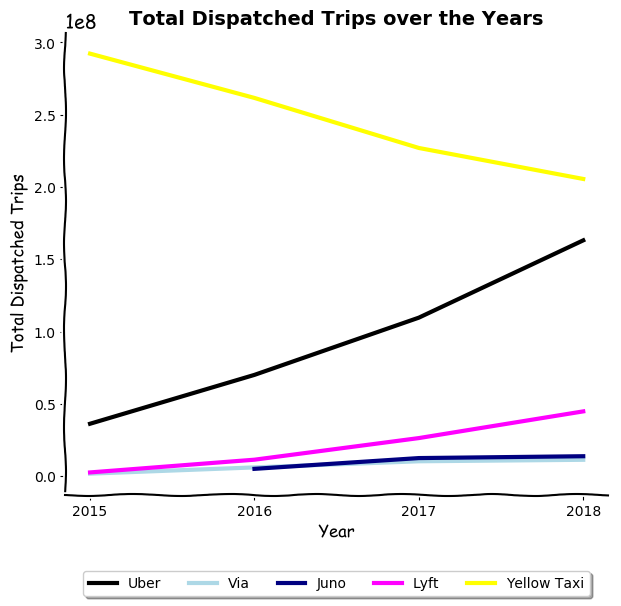

In [676]:
plt.rcParams.update(plt.rcParamsDefault)
plt.xkcd() 

fig, ax = plt.subplots(figsize = (7,6))

ax.plot(uber_sum.index, uber_sum["Total Dispatched Trips"], color = 'black', linewidth = 3.0, label= "Uber")
ax.plot(via_sum.index, via_sum["Total Dispatched Trips"], color = 'lightblue', linewidth = 3.0, label= "Via")
ax.plot(juno_sum.index, juno_sum["Total Dispatched Trips"], color = 'navy', linewidth = 3.0, label= "Juno")
ax.plot(lyft_sum.index, lyft_sum["Total Dispatched Trips"], color = 'magenta', linewidth = 3.0, label= "Lyft")
ax.plot(taxi_sum.index, taxi_sum["Total Dispatched Trips"], color = 'yellow', linewidth = 3.0, label= "Yellow Taxi")

ax.set_title("Total Dispatched Trips over the Years", fontsize = 14, fontweight = "bold") 
ax.set_ylabel("Total Dispatched Trips", fontsize = 12) 
ax.set_xlabel("Year", fontsize = 12) 
ax.set_xticks([2015,2016,2017,2018])


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False) 
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -.15), shadow=True, ncol=5)

As we can see, the more dispatched trips our ride-hailing apps have, the less for NYC taxis. THis makes sense as there is a limited population in NYC so as the competition continues to enter the market and grow, cabs will definitely lose a part of their market share.

Furthermore, we see that Uber has had the strongest performance out of all the apps and is slowly catching up to NYC taxis! We would expect that within the next one or two years, their lines will cross and Uber will surpass NYC Taxis as the most popular mode of transportation out of the options. 

## Next let's look at the Y-O-Y growth rates for each ride hailing app

First I have to build a function that normalizes all of the ride-hailing apps growth rates since they all launched at different times

This function will also calculate the growth rates for each and store them in a list that we can then build into a dictionary to ultimately plot a comparison

In [651]:
def normalize(df):
    
    new_list=[]
    
    var=0 
    
    for i in range(2016, 2019):
        
        var1=var
        
        var=df.loc[i]["Total Dispatched Trips"]/df.loc[2016]["Total Dispatched Trips"]
        
        growth_rate=var-var1
        
        new_list.append(growth_rate)
    
    return new_list

Now let's calculate for JUNO

In [567]:
growth_rates_juno=normalize(juno_sum)

In [568]:
growth_rates_juno

[1.0, 1.4661194151985124, 0.2509935661135536]

Now let's calculate for LYFT

In [569]:
growth_rates_lyft=normalize(lyft_sum)

In [570]:
growth_rates_lyft

[1.0, 1.309144620188687, 1.6172714545726254]

Now let's calculate for UBER

In [571]:
growth_rates_uber=normalize(uber_sum)

In [572]:
growth_rates_uber

[1.0, 0.5648076363234986, 0.7629825797148004]

Now let's calculate for VIA

In [573]:
growth_rates_via=normalize(via_sum)

In [574]:
growth_rates_via

[1.0, 0.6966385122560181, 0.16783708753777438]

Now let's calculate for TAXIS

In [575]:
growth_rates_taxi=normalize(taxi_sum)

In [576]:
growth_rates_taxi

[1.0, -0.1322564697335158, -0.08189362302247916]

Now we have to build a dictionary that holds all of the lists in order to convert it into a dataframe

In [577]:
growth_dict= {"Uber": growth_rates_uber,
                   "Lyft": growth_rates_lyft,
                   "Juno": growth_rates_juno,
                   "Via": growth_rates_via,
             "Taxi": growth_rates_taxi}

In [578]:
growth_dict

{'Uber': [1.0, 0.5648076363234986, 0.7629825797148004],
 'Lyft': [1.0, 1.309144620188687, 1.6172714545726254],
 'Juno': [1.0, 1.4661194151985124, 0.2509935661135536],
 'Via': [1.0, 0.6966385122560181, 0.16783708753777438],
 'Taxi': [1.0, -0.1322564697335158, -0.08189362302247916]}

In [579]:
growth_rates_df=pd.DataFrame(growth_dict)

In [580]:
growth_rates_df

,Uber,Lyft,Juno,Via,Taxi
0,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.564808,1.309145,1.466119,0.696639,-0.132256
2,0.762983,1.617271,0.250994,0.167837,-0.081894


In [581]:
Year=['2016', '2017', '2018']

In [582]:
growth_rates_df['Year'] = Year

In [583]:
growth_rates_df

,Uber,Lyft,Juno,Via,Taxi,Year
0,1.000000,1.000000,1.000000,1.000000,1.000000,2016
1,0.564808,1.309145,1.466119,0.696639,-0.132256,2017
2,0.762983,1.617271,0.250994,0.167837,-0.081894,2018


In [584]:
growth_rates_df=growth_rates_df.set_index(['Year'])

In [585]:
growth_rates_df

,Uber,Lyft,Juno,Via,Taxi
Year,,,,,
2016,1.000000,1.000000,1.000000,1.000000,1.000000
2017,0.564808,1.309145,1.466119,0.696639,-0.132256
2018,0.762983,1.617271,0.250994,0.167837,-0.081894


Now let's plot our results!

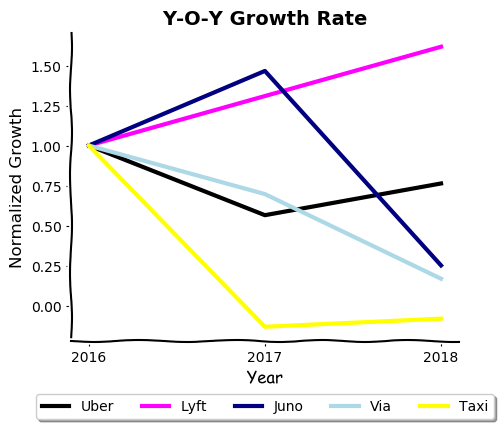

In [668]:
plt.rcParams.update(plt.rcParamsDefault)
plt.xkcd() 

fig, ax = plt.subplots(figsize = (5,4))

ax.plot(growth_rates_df.index, growth_rates_df["Uber"], color = 'black', linewidth = 3.0, label= "Uber")
ax.plot(growth_rates_df.index, growth_rates_df["Lyft"], color = 'magenta', linewidth = 3.0, label= "Lyft")
ax.plot(growth_rates_df.index, growth_rates_df["Juno"], color = 'navy', linewidth = 3.0, label= "Juno")
ax.plot(growth_rates_df.index, growth_rates_df["Via"], color = 'lightblue', linewidth = 3.0, label= "Via")
ax.plot(growth_rates_df.index, growth_rates_df["Taxi"], color = 'yellow', linewidth = 3.0, label= "Taxi")

ax.set_title("Y-O-Y Growth Rate", fontsize = 14, fontweight = "bold") 
ax.set_ylabel("Normalized Growth", fontsize = 12) 
ax.set_xlabel("Year", fontsize = 12) 

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False) 
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -.15), shadow=True, ncol=5)

In general, we can tell that taxis has a serious decline between 2016 and 2017 as ride-hailing apps began to really take a place in the market. The decline became less drastic between 2017 and 2018.

When comparing the ride-hailing apps to each other, we see that although initially in 2016, Juno had the most growth, Lyft is the only app that has consitently grown over the year. This could be because they branded themselves as a ride-sharing app from the very start and now ride-sharing has become extremely popular. We also see that via has been consistently declining since 2016. Lastly, we see that although Uber dropped off, it has begun to climb again. This could potentially be because they released a subscription service that motivated users to take more rides.

## What about the number of dispatched vehicles?

I also wanted to discover whether the number of drivers for each company had been continually increasing over the years!

*** We will not include taxi data here since we do not have the data for the number of Unique Dispatched Vehicles in this dataset 

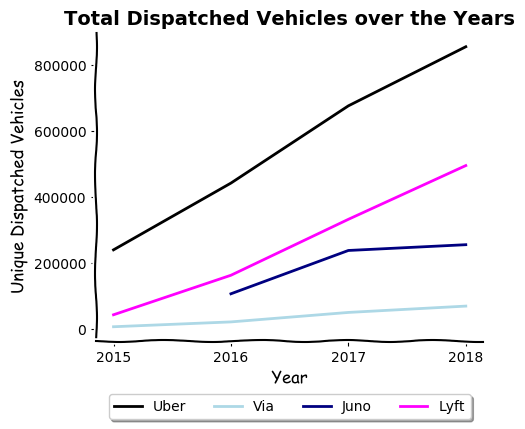

In [666]:
plt.rcParams.update(plt.rcParamsDefault)
plt.xkcd() 

fig, ax = plt.subplots(figsize = (5,4))

ax.plot(uber_sum.index, uber_sum["Unique Dispatched Vehicles"], color = 'black', linewidth = 2.0, label= "Uber")
ax.plot(via_sum.index, via_sum["Unique Dispatched Vehicles"], color = 'lightblue', linewidth = 2.0, label= "Via")
ax.plot(juno_sum.index, juno_sum["Unique Dispatched Vehicles"], color = 'navy', linewidth = 2.0, label= "Juno")
ax.plot(lyft_sum.index, lyft_sum["Unique Dispatched Vehicles"], color = 'magenta', linewidth = 2.0, label= "Lyft")

ax.set_title("Total Dispatched Vehicles over the Years", fontsize = 14, fontweight = "bold") 
ax.set_ylabel("Unique Dispatched Vehicles", fontsize = 12) 
ax.set_xlabel("Year", fontsize = 12) 
ax.set_xticks([2015,2016,2017,2018])


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False) 
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -.15), shadow=True, ncol=4)



This graph clearly proves that these applications have been bringing on more and more drivers and therefore registerning more and more vehicles. Just as we saw in the graph before, Juno's growth has definitely slown since 2017 which has affected the number of dispatched vehicles for the brand. Similarly, we see that Lyft has consistently grown since 2016 in the previous graph, and in turn we see them dispatching more and more vehicles each year.

## How about the seasonality of choosing to take a car?

Now we need to group by month rather than year....

#### Start w/ JUNO

In [588]:
juno2=juno.groupby(['Month'])

In [589]:
juno_month_mean=juno2.mean()

In [590]:
juno_month_mean

,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
Month,,,
1,1.188115e+06,0.0,20287.666667
2,1.166980e+06,0.0,20126.000000
3,8.660770e+05,0.0,13937.000000
4,7.570880e+05,0.0,15950.000000
5,7.397857e+05,0.0,16367.000000
6,7.822840e+05,0.0,17189.333333
7,7.996837e+05,0.0,17289.666667
8,8.660867e+05,0.0,17381.333333
9,9.114350e+05,0.0,17727.000000


#### Now LYFT

In [591]:
lyft2=lyft.groupby(['Month'])

In [592]:
lyft_month_mean=lyft2.mean()

In [593]:
lyft_month_mean

,Year,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
Month,,,,
1,2017.5,2.403548e+06,337744.250000,29104.750000
2,2017.0,1.810314e+06,219681.333333,22687.666667
3,2017.0,2.028991e+06,213809.000000,22793.666667
4,2016.5,1.497694e+06,139297.500000,18515.750000
5,2016.5,1.607581e+06,135007.250000,19811.500000
6,2016.5,1.715055e+06,242466.000000,21006.000000
7,2016.5,1.764211e+06,258947.750000,21875.750000
8,2016.5,1.933885e+06,258239.000000,22976.500000
9,2016.5,1.989284e+06,271668.250000,24017.000000


#### Now UBER

In [594]:
uber2=uber.groupby(['Month'])

In [595]:
uber_month_mean=uber2.mean()

In [596]:
uber_month_mean

,Year,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
Month,,,,
1,2017.0,7981307.40,1245929.20,46773.80
2,2016.5,6439129.50,660847.25,39322.75
3,2016.5,7328283.25,880769.50,40170.50
4,2016.5,7196987.75,887343.00,41374.75
5,2016.5,7405314.25,829962.50,42374.00
6,2016.5,7585116.50,1067062.25,45199.00
7,2016.5,8008015.25,1249477.00,46858.00
8,2016.5,8065939.00,1329581.75,48704.25
9,2016.5,8441559.00,1348301.00,50606.50


#### Now VIA

In [597]:
via2=via.groupby(['Month'])

In [598]:
via_month_mean=via2.mean()

In [599]:
via_month_mean

,Year,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
Month,,,,
1,2017.5,762126.000000,305244.500000,4186.750000
2,2017.0,646205.000000,207396.666667,3258.333333
3,2017.0,728372.666667,230245.000000,3245.333333
4,2016.5,578563.250000,174610.500000,2783.000000
5,2016.5,612806.500000,192257.000000,2955.500000
6,2016.5,547652.750000,231805.250000,2978.500000
7,2016.5,612292.000000,286352.000000,3110.500000
8,2016.5,655796.000000,304123.500000,3147.500000
9,2016.5,669105.250000,319267.500000,3504.000000


#### Now TAXIS

In [634]:
taxi2=taxi_df.groupby(['Month'])

In [635]:
taxi_month_mean=taxi2.mean()

In [636]:
taxi_month_mean

,Trips Per Day,Days Per Month,Total Dispatched Trips
Month,,,
01,329445.666667,31.0,1.021282e+07
02,354035.777778,28.0,9.913002e+06
03,352692.444444,31.0,1.093347e+07
04,369628.750000,30.0,1.108886e+07
05,357425.500000,31.0,1.108019e+07
06,348581.750000,30.0,1.045745e+07
07,308859.500000,31.0,9.574644e+06
08,301151.250000,31.0,9.335689e+06
09,319405.750000,30.0,9.582172e+06


We want the indexes for the taxis and the ride-hailing apps to be the same so we can plot them side by side, therefore we have to change the taxi months from 01 to 1 and so on

In [639]:
Month_Corrected = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"] 
  
taxi_month_mean['Month_Corrected'] = Month_Corrected

In [640]:
taxi_month_mean

,Trips Per Day,Days Per Month,Total Dispatched Trips,Month_Corrected
Month,,,,
01,329445.666667,31.0,1.021282e+07,1
02,354035.777778,28.0,9.913002e+06,2
03,352692.444444,31.0,1.093347e+07,3
04,369628.750000,30.0,1.108886e+07,4
05,357425.500000,31.0,1.108019e+07,5
06,348581.750000,30.0,1.045745e+07,6
07,308859.500000,31.0,9.574644e+06,7
08,301151.250000,31.0,9.335689e+06,8
09,319405.750000,30.0,9.582172e+06,9


#### Let's plot!

We will analyze taxis separately because its values are much larger and therefore dominate our ride-hailing data so we can't see it.

We also want to see if there is a difference in seasonality between ride-hailing apps and NYC Taxis

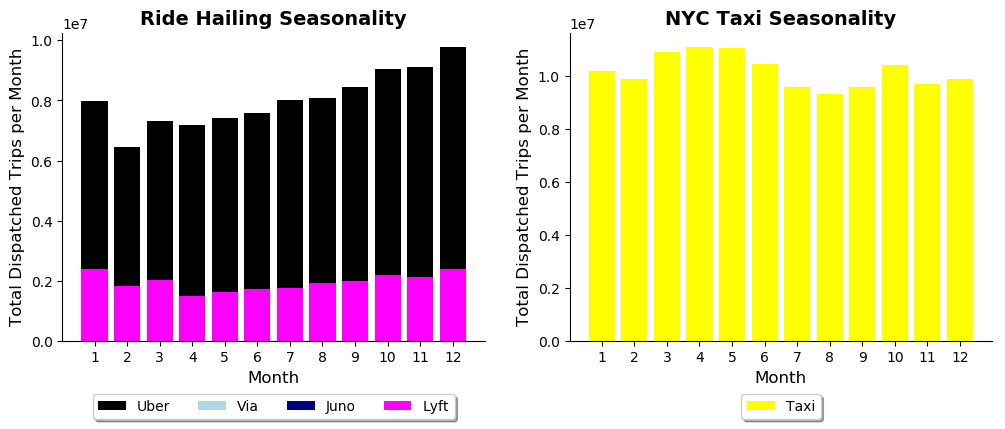

In [647]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4)) 

ax[0].bar(uber_month_mean.index, uber_month_mean["Total Dispatched Trips"], color = 'black', label= "Uber")
ax[0].bar(via_month_mean.index, via_month_mean["Total Dispatched Trips"], color = 'lightblue', label= "Via")
ax[0].bar(juno_month_mean.index, juno_month_mean["Total Dispatched Trips"], color = 'navy', label= "Juno")
ax[0].bar(lyft_month_mean.index, lyft_month_mean["Total Dispatched Trips"], color = 'magenta', label= "Lyft")

ax[1].bar(taxi_month_mean["Month_Corrected"], taxi_month_mean["Total Dispatched Trips"], color = 'Yellow', label= "Taxi")

ax[0].set_title("Ride Hailing Seasonality", fontsize = 14, fontweight = "bold") 
ax[1].set_title("NYC Taxi Seasonality", fontsize = 14, fontweight = "bold") 

ax[0].set_ylabel("Total Dispatched Trips per Month", fontsize = 12) 
ax[0].set_xlabel("Month", fontsize = 12) 
ax[0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])

ax[1].set_ylabel("Total Dispatched Trips per Month", fontsize = 12) 
ax[1].set_xlabel("Month", fontsize = 12)

ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False) 
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -.15), shadow=True, ncol=4)


ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False) 
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -.15), shadow=True)


Ride Hailing Apps: as expected, in the colder months of the year, people are more likely to use ride-hailing apps. However, we see this even more in October and November than we do in March and April, potentially because people are not yet adjusted to the cold and therefore are more likely to give in to paying for a car. We see a huge increase in December, which is probably due to the number of tourists in the city for the holidays.

Taxis: For taxis, we see that the most taxis are taken in March, April, and May. This is likely because these are the rainiest months of the year. When it starts raining, people hail a cab immediately rather than going inside somewhere and waiting to call a car from an app. Also, ride-hailing apps typically sur-charge when it is raining so people will choose to take taxis if they can since this will likely be the cheaper option as well as the quicker option.

## Has ride sharing gotten more popular this year?
Via started the ride-sharing trend in 2016, before any other app was doing it. In order to compete, both Lyft and Uber incorporated ride sharing. Let's see if this has become an increasingly popular option on these ride-hailing apps

We are excluding Juno from this aspect of the study since it has yet to incorporate a ride-sharing feature to its application. We obviously exclude taxis as well since you cannot register as "ride sharing" when you enter a cab.

In [91]:
def ride_sharing(df,year):
    
    df_ride_sharing = df[df["Year"] == year]
    # The brand
    
    return df_ride_sharing[["Base Name", "Year", "Month", "Total Dispatched Shared Trips"]]

In [92]:
ride_sharing_uber=ride_sharing(uber,2018)

In [105]:
ride_sharing_uber=ride_sharing_uber.set_index("Month")

In [110]:
ride_sharing_uber=ride_sharing_uber.reindex([1,2,3,4,5,6,7,8,9,10,11,12])
ride_sharing_uber

,Base Name,Year,Total Dispatched Shared Trips
Month,,,
1,UBER,2018,2613169
2,UBER,2018,2643389
3,UBER,2018,3523078
4,UBER,2018,3549372
5,UBER,2018,3319850
6,UBER,2018,3171911
7,UBER,2018,3877702
8,UBER,2018,4027450
9,UBER,2018,3943561


In [93]:
ride_sharing_lyft=ride_sharing(lyft,2018)

In [104]:
ride_sharing_lyft=ride_sharing_lyft.set_index("Month")

In [111]:
ride_sharing_lyft=ride_sharing_lyft.reindex([1,2,3,4,5,6,7,8,9,10,11,12])
ride_sharing_lyft

,Base Name,Year,Total Dispatched Shared Trips
Month,,,
1,LYFT,2018,641261
2,LYFT,2018,659044
3,LYFT,2018,641427
4,LYFT,2018,557190
5,LYFT,2018,540029
6,LYFT,2018,602496
7,LYFT,2018,615331
8,LYFT,2018,620932
9,LYFT,2018,641585


In [95]:
ride_sharing_via=ride_sharing(via,2018)

In [103]:
ride_sharing_via=ride_sharing_via.set_index("Month")

In [112]:
ride_sharing_via=ride_sharing_via.reindex([1,2,3,4,5,6,7,8,9,10,11,12])
ride_sharing_via

,Base Name,Year,Total Dispatched Shared Trips
Month,,,
1,VIA,2018,662745
2,VIA,2018,622190
3,VIA,2018,690735
4,VIA,2018,698442
5,VIA,2018,703334
6,VIA,2018,496676
7,VIA,2018,562672
8,VIA,2018,567411
9,VIA,2018,651686


### Now let's plot...

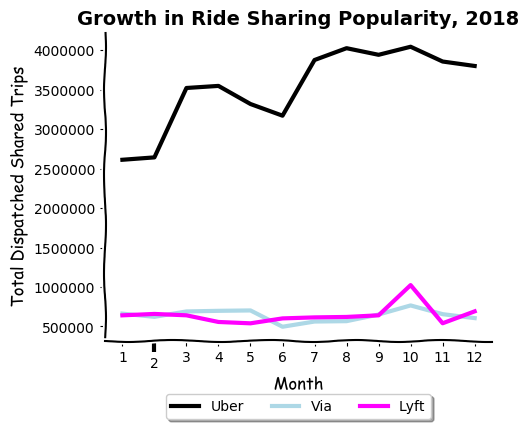

In [664]:
plt.rcParams.update(plt.rcParamsDefault)
plt.xkcd() 

fig, ax = plt.subplots(figsize = (5,4))

#ax.plot(usdata.index, usdata.gdp_growth
ax.plot(ride_sharing_uber.index, ride_sharing_uber["Total Dispatched Shared Trips"], color = 'black', linewidth = 3.0, label= "Uber")
ax.plot(ride_sharing_via.index, ride_sharing_via["Total Dispatched Shared Trips"], color = 'lightblue', linewidth = 3.0, label= "Via")
ax.plot(ride_sharing_lyft.index, ride_sharing_lyft["Total Dispatched Shared Trips"], color = 'magenta', linewidth = 3.0, label= "Lyft")

ax.set_title("Growth in Ride Sharing Popularity, 2018", fontsize = 14, fontweight = "bold") 
ax.set_ylabel("Total Dispatched Shared Trips", fontsize = 12) 
ax.set_xlabel("Month", fontsize = 12) 
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False) 
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -.15), shadow=True, ncol=3)

As you can see, there is no consistent growth in ride-sharing popularity. However, we do see that Uber has the strongest growth in the number of dispatched shared trips, which is suprising considering that they launched the ride-sharing feature last out of all 3 apps. 